# Problem Definition
Task: To estimate hourly power consumptions of tomorrow from the power consumptions history until today.

Since the task was not set in https://www.kaggle.com/robikscube/hourly-energy-consumption, We personally set the task which is stated above.

This energy forecasting can be used for how much powers need to be generated by energy operators, to control energy storages, and for day by day energy trading.

In the use case of power generation, accurate energy forecasting is quite important. If the estimation is lower than actual demand, black out would happen. If the estimation it too high, fuels to generate powers would be wasted. The risk of black out is higher than wasting fuels because electricity is essential for human's life.
So, the forecasting should be slightly higher than actual to avoid risks.

In order to simplify the tasks, we assume that these use cases already have working system with API of hourly energy estimation as input, and what we need to do is to provide the hourly energy estimation to the system.

More specifically, the task is that,

at 12 AM each day, forecasting module provides the estimated power consumptions of each hour on the day. 

# Plan

For any objectives, the higher accuracy and the lower computing costs are the better ideally. If plenty of time and money were given, we could provide perfect solution for the tasks. However time, money, resources and so on are limited and there is a trade off between these items and the performance. So we need to think the core requirements and compromises, and show some potentials if more investment would be given.

First thing we may need to decide is the deadline of the deployment or hands-over. Then, we can propose the quality of the products (accuracy, computational speed), sub goals to achieve the goals, resources we can use(number of person, environments) and how much money we need.

## Requirement
- Deadline and resources
    - 7 days later
    - 1 person
- Environment
    - Linux system
    - web API (RESTful)
- modules and API
    - model to estimate the powers
    - Reasonably high accuracy (Match rate of 0.9)
    - API to return estimation from some input data
    - package of the system
- hourly power estimation in a day
    - reasonable accurate
    - at 12 AM, 1 hour each of all the day
- document
    - Data analysis
    - basic description of the model
    - Evaluation of the estimation
    - Future work
    
## Development plan
The deadline is assumed 7 days later - person. The development plan would be, 
- Data analysis and Discussion -- 2 days - person
- Feature selection and model setting -- 1 day - person
- Evaluation and Discussion -- 2 days - person
- Wrap up (modules, API, documents) 2 days - person

# Overall system
- Model training module
    - Preprocessing
    - Prediction on the model
    - Post processing
- Prediction module
    - Preprocessing
    - Prediction on the model
    - Post processing
- Data storage
    - training
    - prediction
    - parameter files (model parameters, normalising parameters)
- prediction API
    - data to convert features as input
    - prediction as output
    - parameter files to load        

# Data
https://www.kaggle.com/robikscube/hourly-energy-consumption
```
PJM Hourly Energy Consumption Data
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.
```

# Assumption before investigating data
Objective of this analysis is to find consistent information to build the model.
- Long term trends
    - There would be repeated patterns and consumptions would gradually increase year by year because of global warming.
    - Higher power consumption in Summer and Winter than in Spring and Autumn because of heating or cooling.
    - Winter is the highest because heating could consume energies than cooling.
- Daily trends
    - There peaks around dinner time, lunch time and breakfast time.
    - Lowest consumptions would in sleeping time (between 0 AM and 5 AM).
- So, the trends would be basic consumptions as in Spring and Autumn, then cooling consumptions are on basic consumptions in summer time and heating consumptions are on them in winter time.
- Weekly or holiday trends
    - Patterns of Saturday, Sunday and Holidays would be quite similar and patterns among the week days are also similar.
    - Patterns of week days and week end + holidays could be different.

# import libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import plotter

sys.path.append(os.path.join('..', 'hec'))
import utils.data_handler as dh
from utils.logger import logger
logger.setLevel('WARNING')

# data loading
There are 13 csv files in https://www.kaggle.com/robikscube/hourly-energy-consumption. I took first 4 files in order to focus on analysis for them.

In [3]:
data_dir = '../data/'
n_data_to_load = 4
data = dh.data_loader(data_dir, n_data_to_load)

# Data full sequence

## plots description
- These plots show full sequence of the data. Each colour indicates a month.
- These plots explain how raw data look like and some basic data information such as how long does each dataset contains or how do the power consumptions behave in terms of long term trends.

## analysis
- Each dataset contains different data length. Also, each data came from different time period. 
- There seems to be a cyclic pattern during each year.
    - There are patterns which have higher consumptions in summertime and wintertime, and relatively lower consumptions in Spring and Autumn as we assumed.
    - Increasing trends cannot be seen from this plots as we assumed the affects from global warming. To see that trends, we may need longer data or some statistics.
    
- Daily trends also need checking.
- We may want to see some basic statistics such as averages, max and min.

dataset:AEP_hourly, full sequence of power consumptions


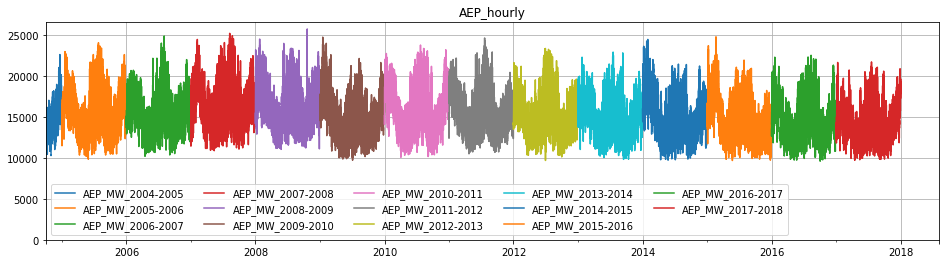

dataset:COMED_hourly, full sequence of power consumptions


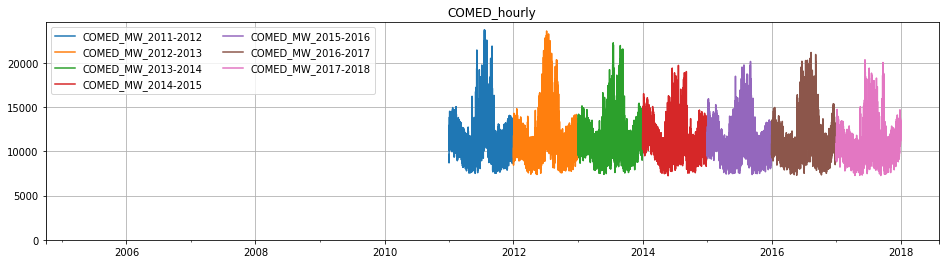

dataset:DAYTON_hourly, full sequence of power consumptions


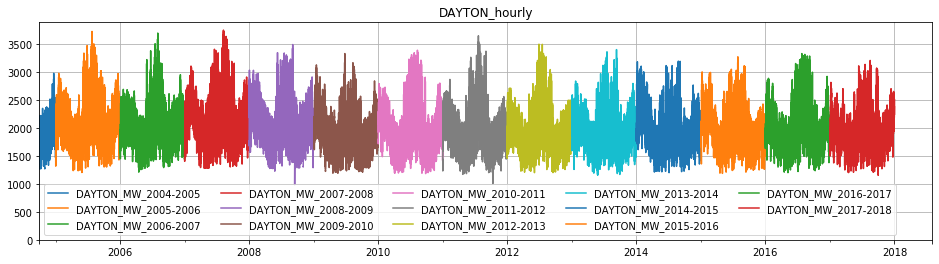

dataset:DEOK_hourly, full sequence of power consumptions


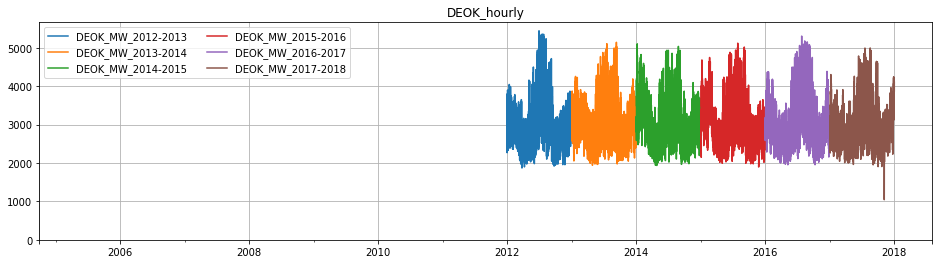

In [4]:
plotter.plot_all_seq_all_data(data)

# daily consumptions (all periods, January, April, July and October)

## Description
- For each dataset, Daily power consumptions in January, April, July and October are shown.
- Graphs in first row show their row data. Second row shows the average(red line) and standard variance (blue shaded).



## Analysis
- Daily trends
    - sleeping time (around 0 AM to 5 AM) is the lower power consumptions than the daytime in any seasons. This is natural because people usually don't use many electricities while sleeping.
    - Both winter time and summer time have higher consumptions than in spring/autumn. This trend implies the more appliances are used in summer/winter than spring/autumn. Moreover, appliances can be heaters or coolers.
    - There are also higher variances of winter/summer than the others. This trend could be said the power consumptions are affected by external factors such as temperatures. To see more details we should investigate with in the season.
- According to the spring and autumn data, they have quite similar trends to each other.
    - The peak and is usually in dinner time (around 8 PM).
    - There is second (sometimes highest) peak during breakfast time (around 7 AM).  
    - There are no significant bumps around lunch time though I expected there was a peak.
- Comparison between Winter and Summer
    - In the summertime, peaks are around 3 PM on the other hand, in the winter time, there two peaks which are around 7 AM and 8 PM. This is because cooling appliances are used during the hottest time which is 3 PM in summer, and heating appliances are used in mornings and evenings in the winter time.

dataset:AEP_hourly, daily consumptions in January, April, July, October


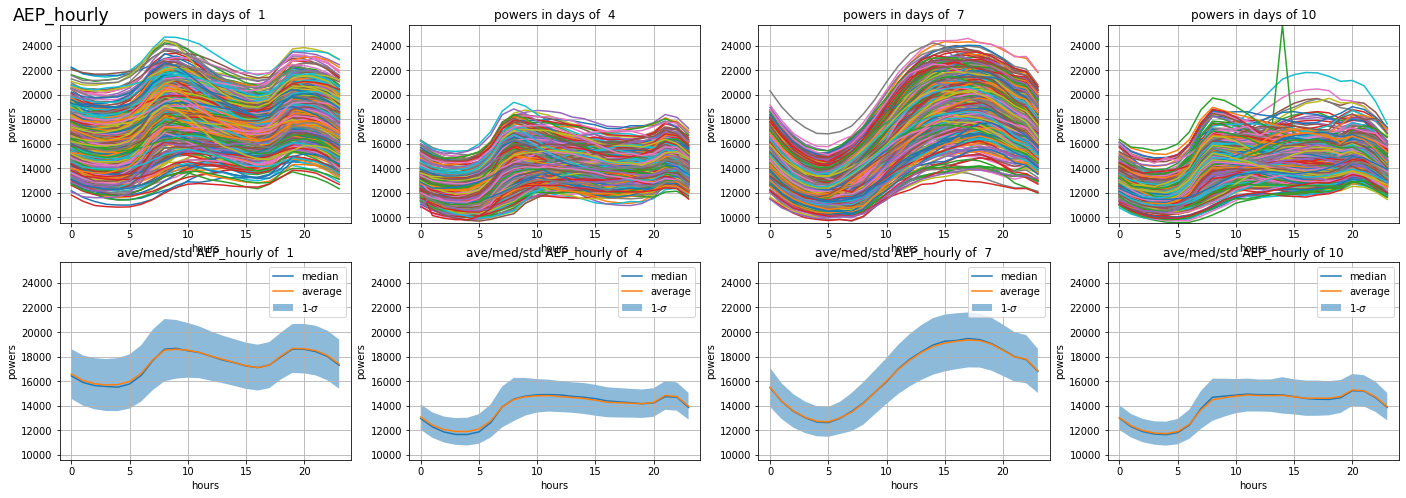

dataset:COMED_hourly, daily consumptions in January, April, July, October


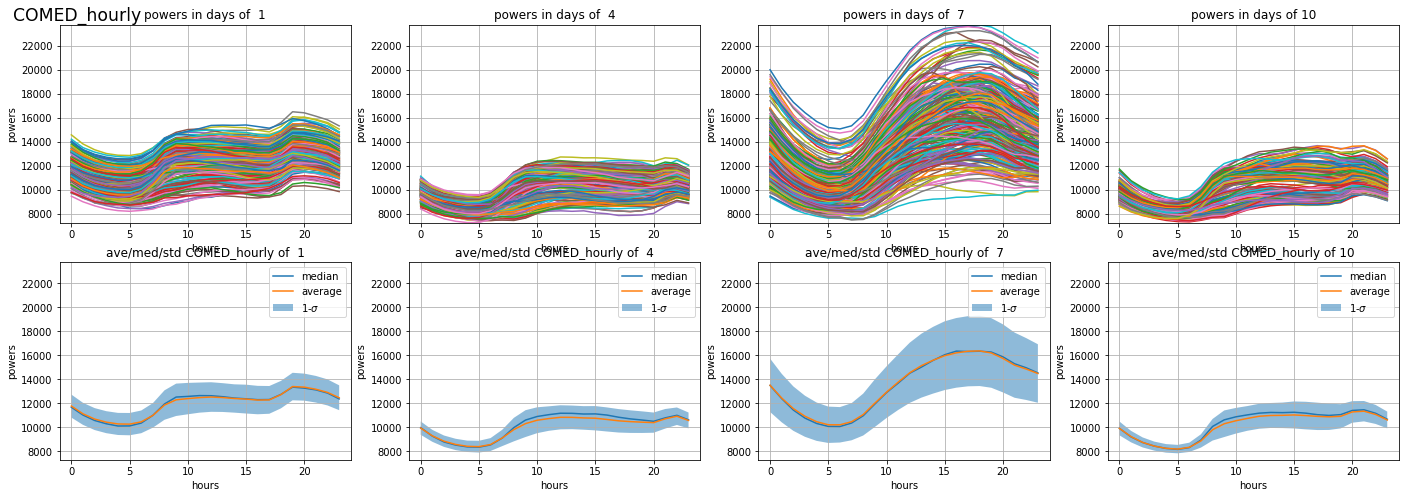

dataset:DAYTON_hourly, daily consumptions in January, April, July, October


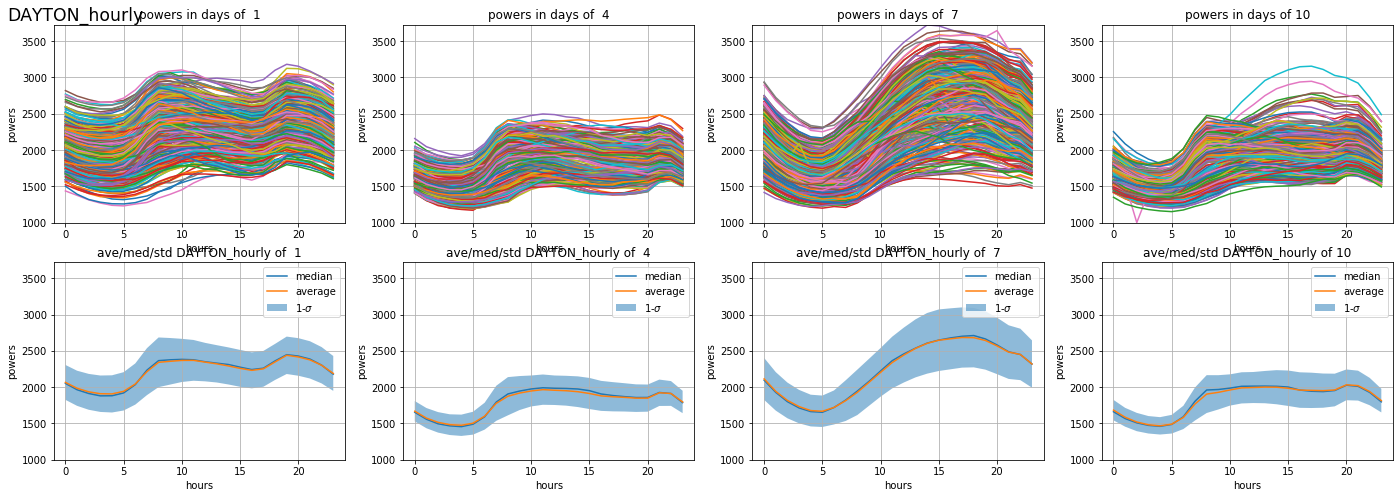

dataset:DEOK_hourly, daily consumptions in January, April, July, October


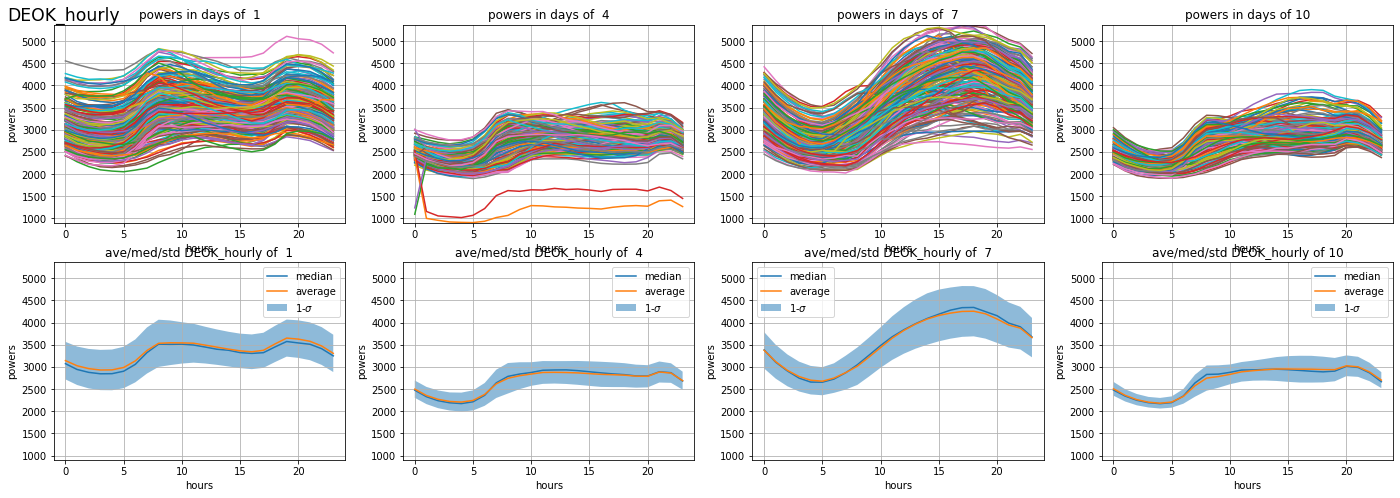

In [5]:
plotter.plot_seasonaly(data, [1, 4, 7, 10])

# day of week comparison, Mon(0) to Sun(6) in January, April, July and October

## Descriptions
- These plots show row data and averages and standard deviations on each week day.
- Graphs in first row show their row data. Second row shows the average(red line) and standard variance (blue shaded).
- In order to reduce the seasonal effect, we are focusing the data in May and July.

## Analysis
- Patterns in weekdays are quite similar each other. Saturdays and Sundays are also similar. However holidays are unique compared to the other days.
- Holidays have high variances especially around dinner time. We can guess the reasons that people behave differently compared to the usual weekdays and weekends and have big dinners in holidays.
- On the other hand, people have routines in usual weekdays and weekend so covariances are smaller.
- Consumptions in weekends are lower than in the weekdays.

Month: April
dataset:AEP_hourly, Monday to Sunday in April


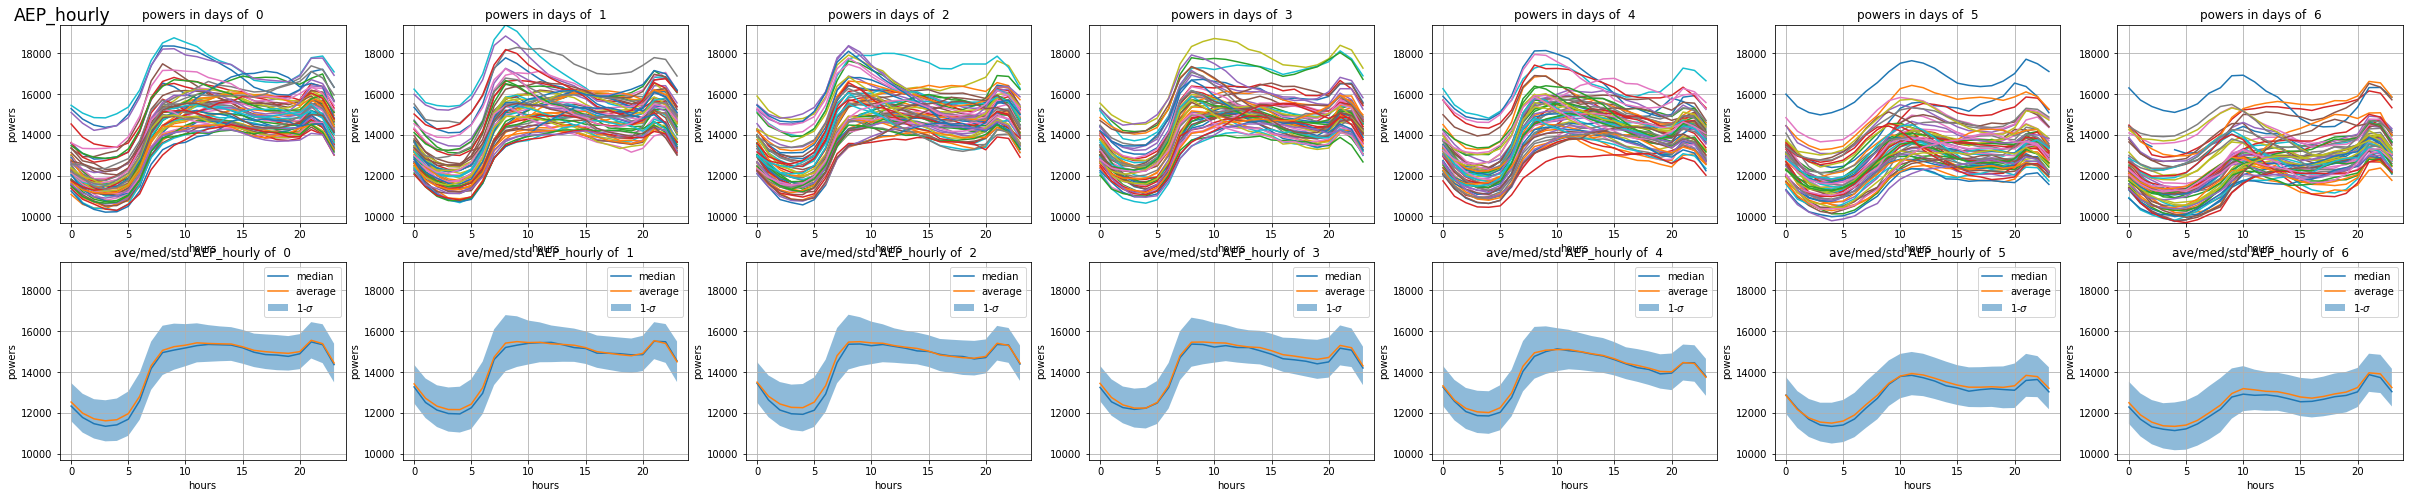

dataset:COMED_hourly, Monday to Sunday in April


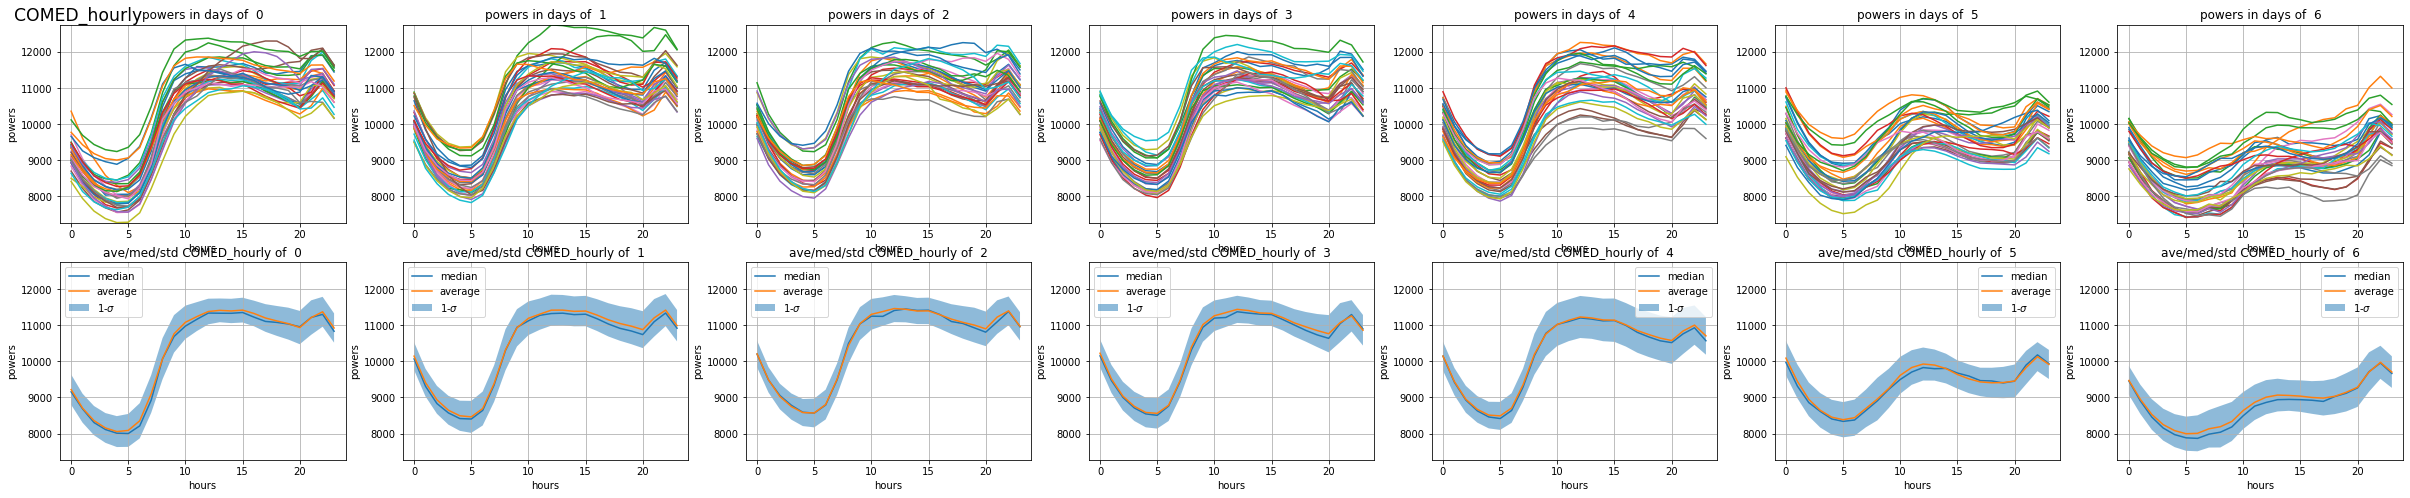

dataset:DAYTON_hourly, Monday to Sunday in April


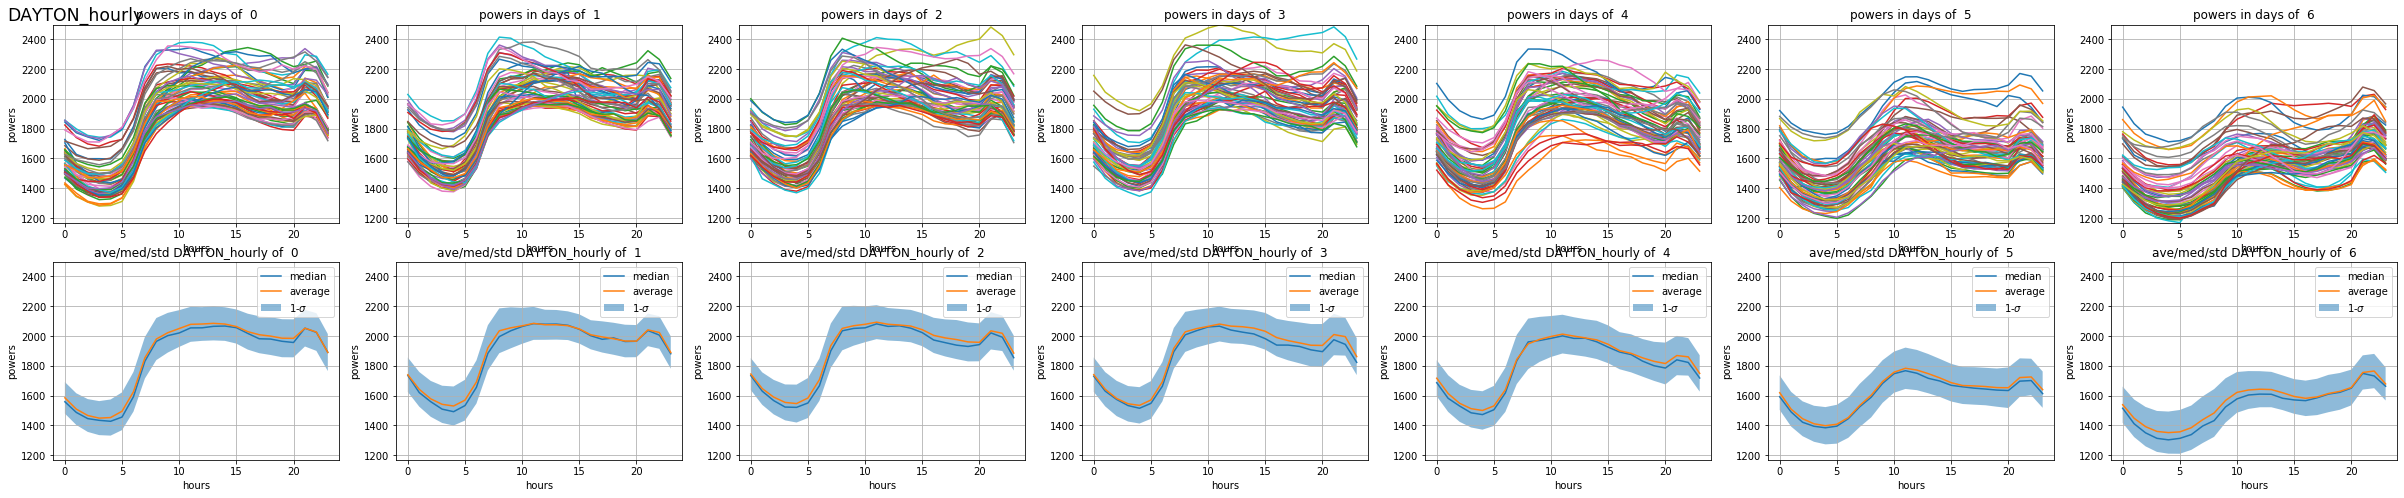

dataset:DEOK_hourly, Monday to Sunday in April


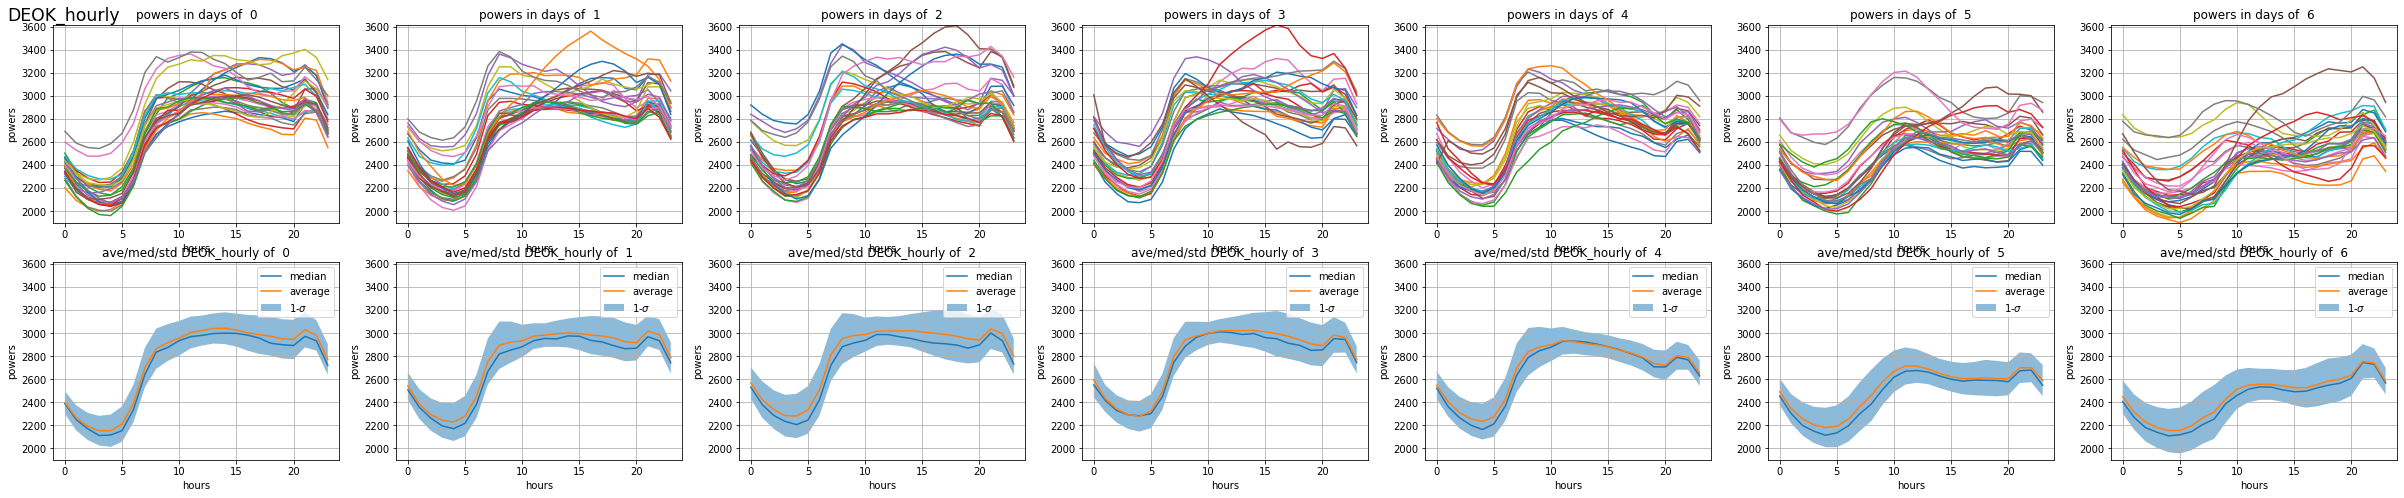

Month: July
dataset:AEP_hourly, Monday to Sunday in July


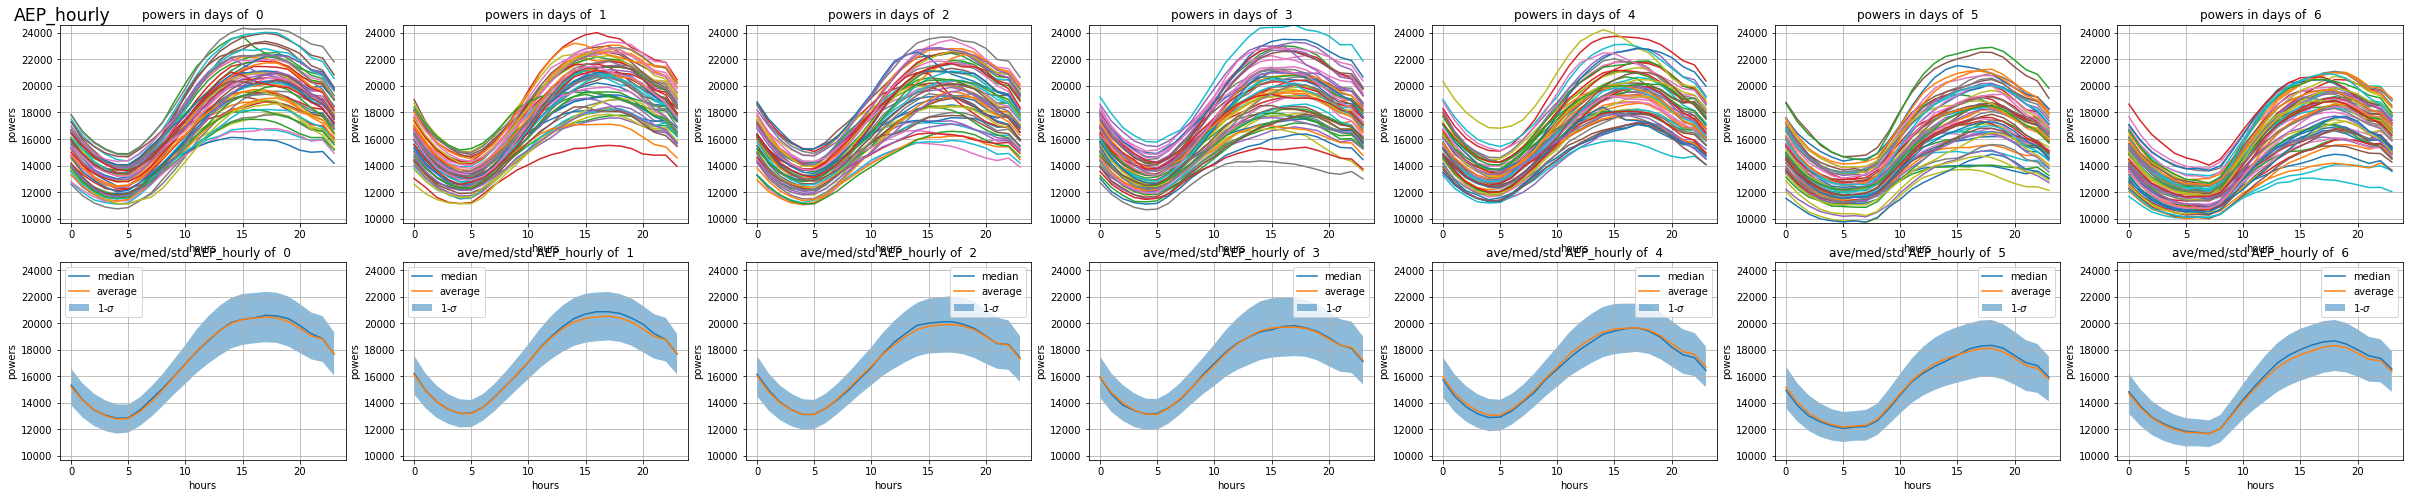

dataset:COMED_hourly, Monday to Sunday in July


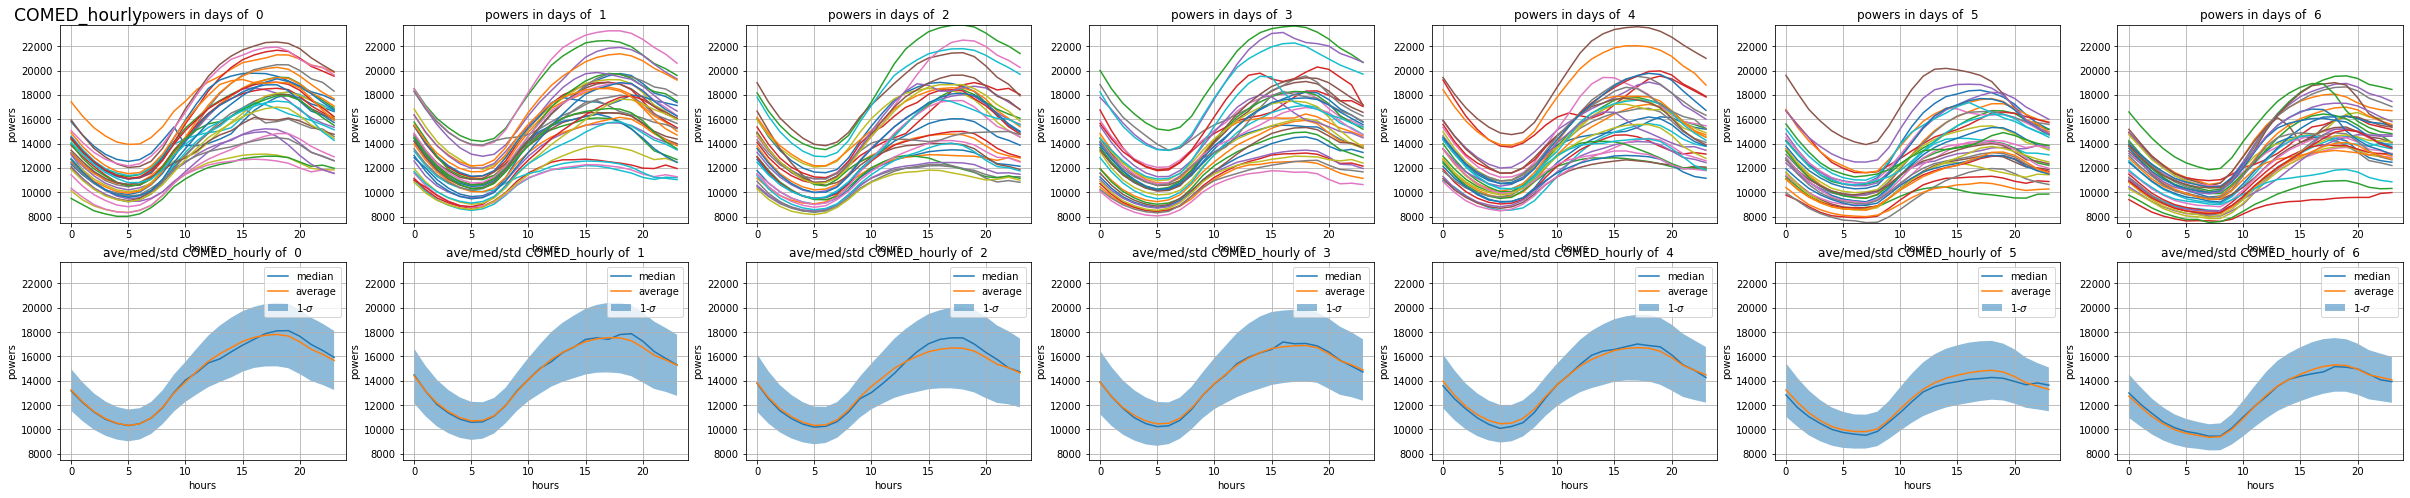

dataset:DAYTON_hourly, Monday to Sunday in July


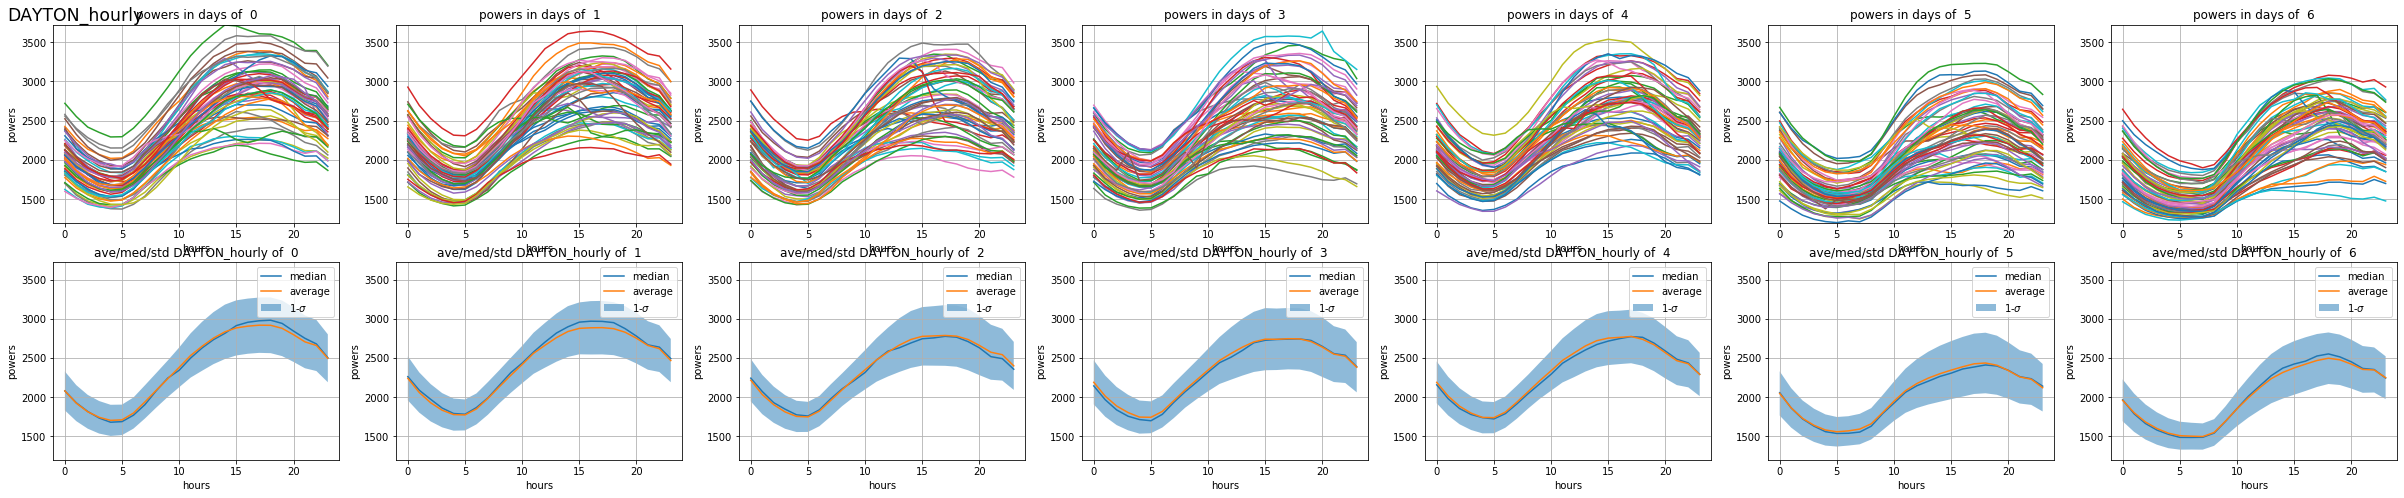

dataset:DEOK_hourly, Monday to Sunday in July


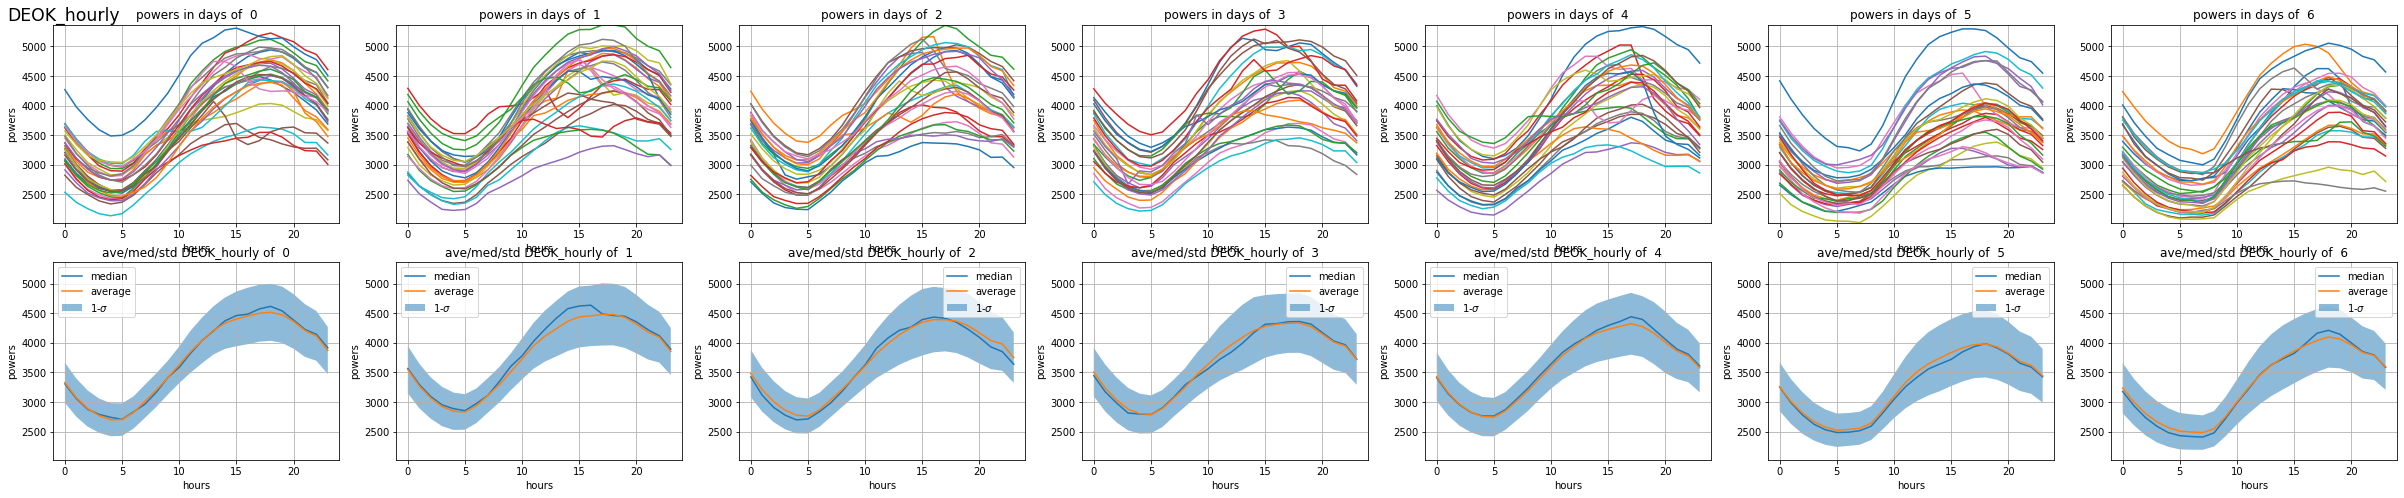

In [6]:
plotter.plot_day_of_week_all(data, [4, 7])

# some stats (min, max, average, std and median) of the data in each dataset
## plot description
- Each graph has dataset in x-axis and power consumptions in y-axis.
- Each dot indicates basic statistics.
    - Red and blue triangles indicate maximum and minimum of each dataset respectively.
    - Light blue crosses are the average and vertical lines indicates their standard deviations.
    - Pink stars shows median of each data.
    - First graph shows the stats of all over the data
    - 2nd to 5th plots shows the stats in January(1), April(4), July(7) and October(10) individually.

## Analysis
- Some dataset has similar stats, however, overall, they are different each other. This is because each dataset came from different region and its weather may be different from each other.
- This means that it could be difficult to forecast the power consumptions from different dataset. To get precise estimations, models should be constructed for each data set.

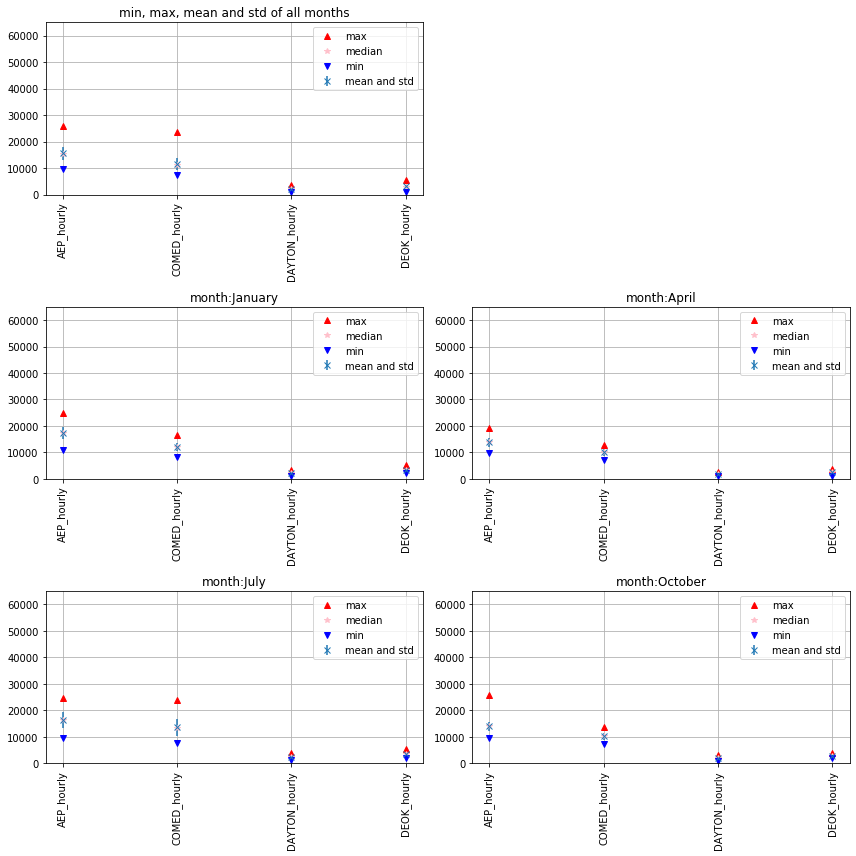

In [7]:
plotter.plot_stats_data_comparison(data)

# Weekly data stats in January, April, July and October of each dataset
## Description
- Each graph shows some statistics of a dataset in a month.
- Each plot has day of week in x-axis and power consumptions in y-axis.
- Red and blue triangles indicate maximum and minimum of each dataset respectively.
- Light blue crosses are the average and vertical lines indicates their standard deviations.
- Pink stars shows median of each data.

## Analysis
- According to see the averages in each dataset and each month, the trends are similar. Power consumptions in weekdays are higher than weekends. 
- Mondays are similar to the other weekdays but slightly smaller.
- Some big drops can be seen from the points of minimums. 

month 1


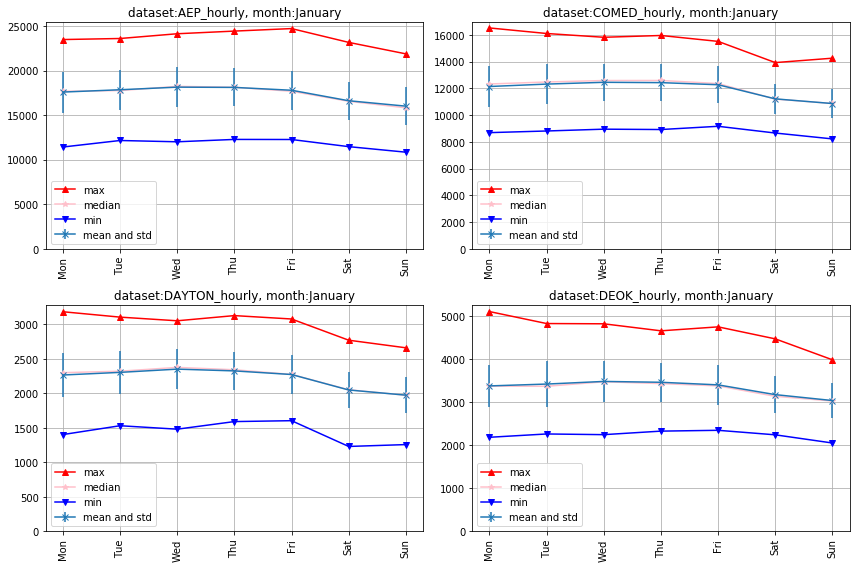

month 5


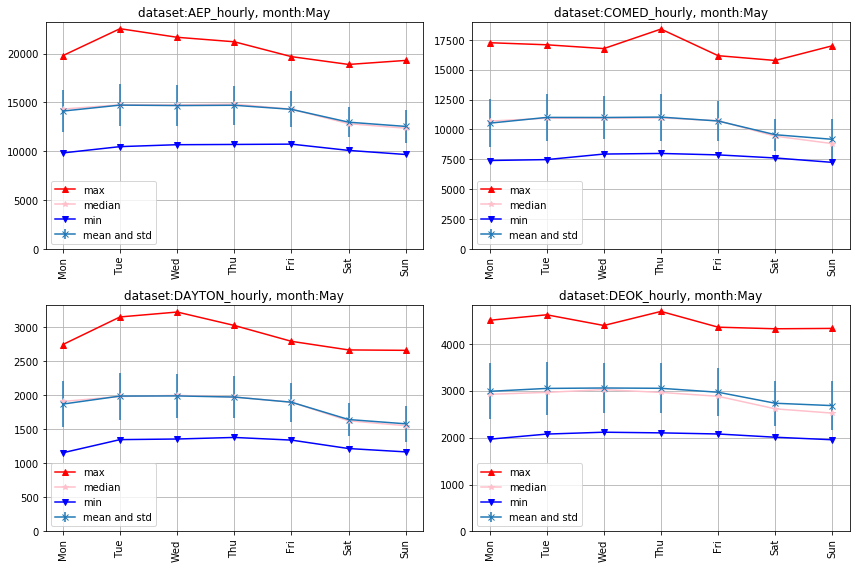

month 7


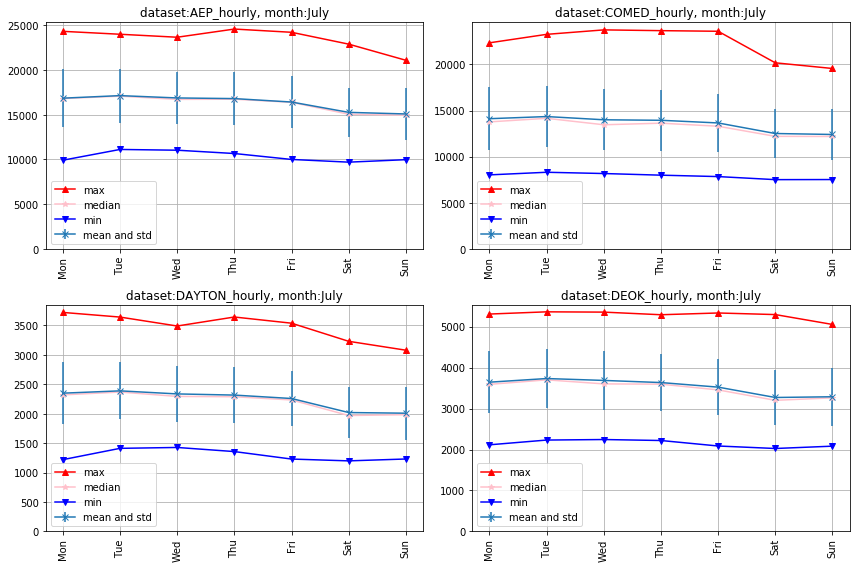

month 10


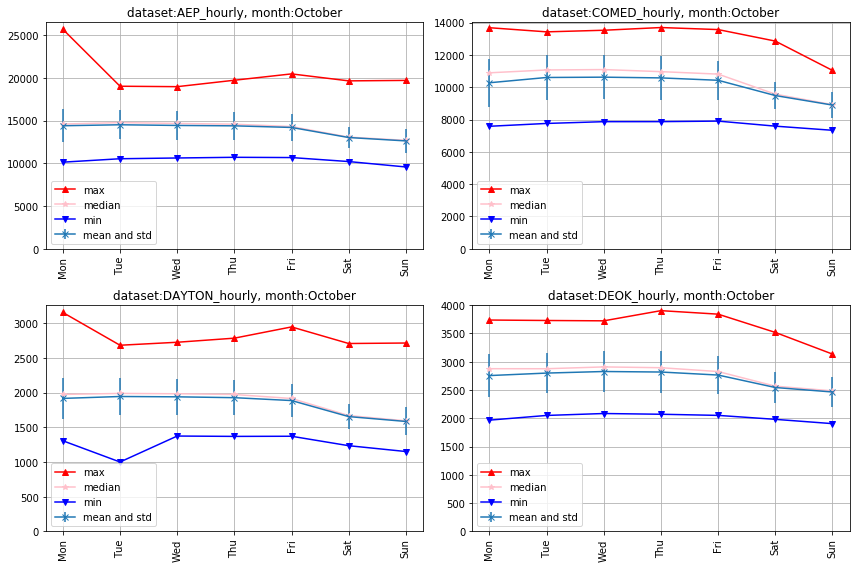

In [8]:
plotter.plot_stats_weekly(data)

# Difference between days at same hours and between hours
## Description
These plots shows statistics of differences between days at same hours and between hours in order to see daily and hourly transitions.
### differences between days at same hours
These values are calculated by taking differences between a day and the previous day at each hour. These stats may show some day by day trends how the power consumptions changes.
### differences between hours
These values are calculated by taking differences between an hour and the previous hour. These stats may show some hour by hour trends how the power consumptions changes.

## Analysis
### differences between days at same hours
With regards to the differences between days at same hours (left columns of the plots), averages are close to zeros. The reason could be the trends from Spring to Summer(getting higher) and Summer to Autumn(getting lower). The trends cancelled each other to give the average values. To figure out more, the stats in each season may need to be seen.
The standard variances are not small This is because of some day of week effect (higher powers in weekdays and lower powers in weekends).
### differences between hours
Averages of differences between hours didn't stay around zero. This makes sense because powers should be getting higher toward to daytime from night time. In terms of standard variances, They are relatively small compared to the standard variances of differences between days at same hours. This may indicate daily routines are stable compared to day by day trends.

AEP_hourly


/anaconda2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:994: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


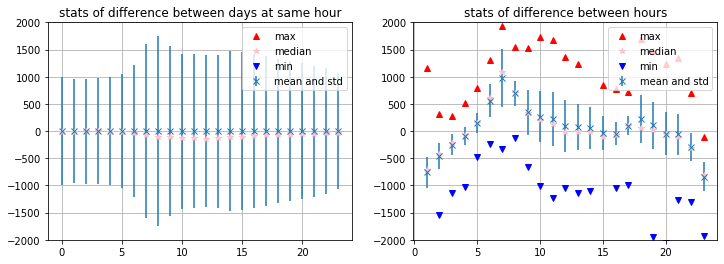

COMED_hourly


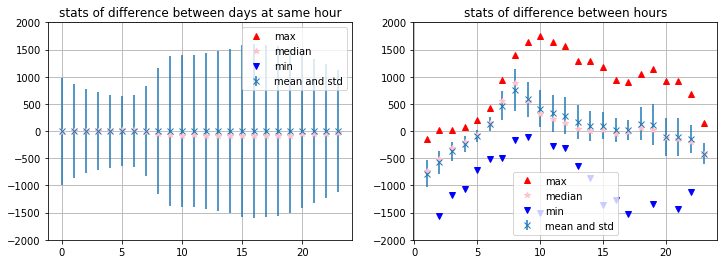

DAYTON_hourly


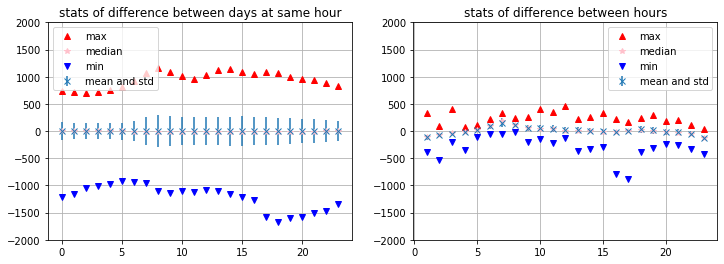

DEOK_hourly


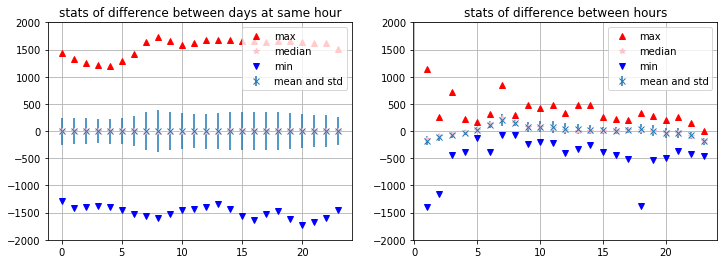

In [9]:
plotter.plot_diff_days_hours_all(data)

AEP_hourly(January)


/anaconda2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


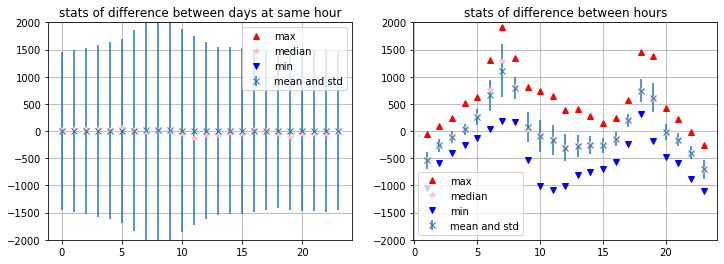

AEP_hourly(April)


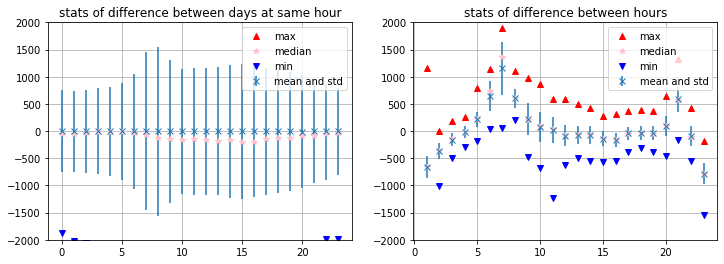

AEP_hourly(July)


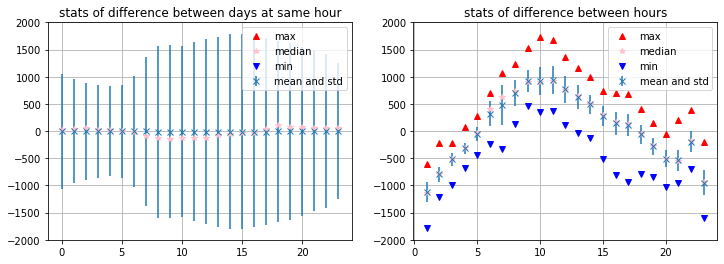

AEP_hourly(October)


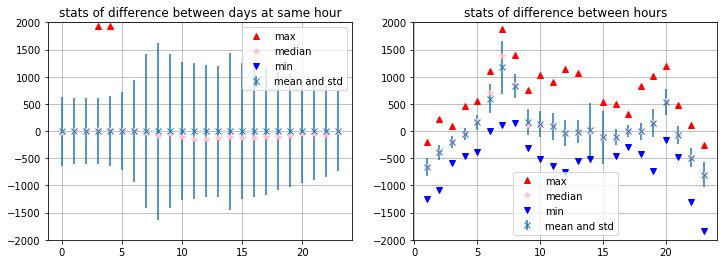

COMED_hourly(January)


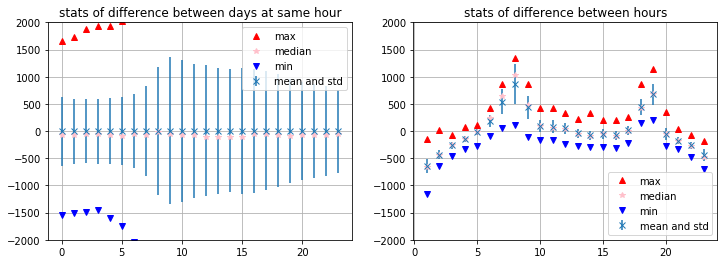

COMED_hourly(April)


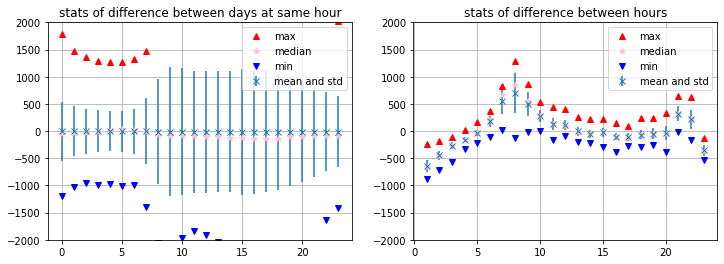

COMED_hourly(July)


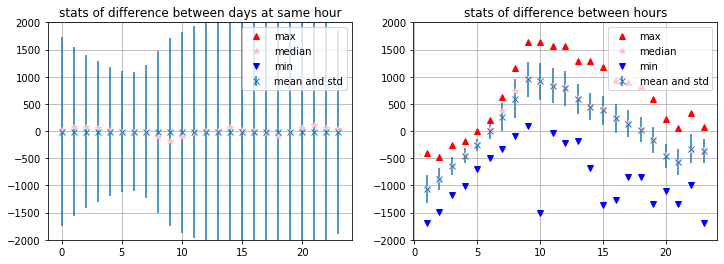

COMED_hourly(October)


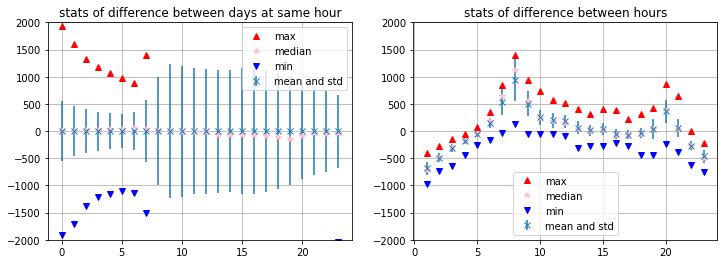

DAYTON_hourly(January)


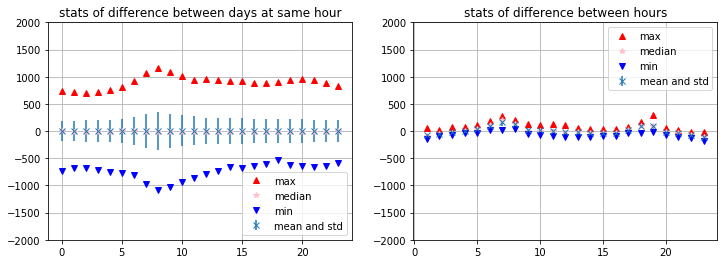

DAYTON_hourly(April)


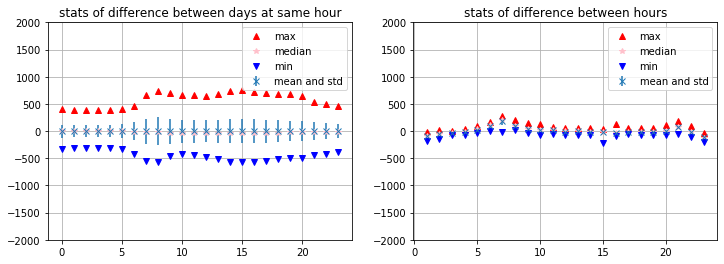

DAYTON_hourly(July)


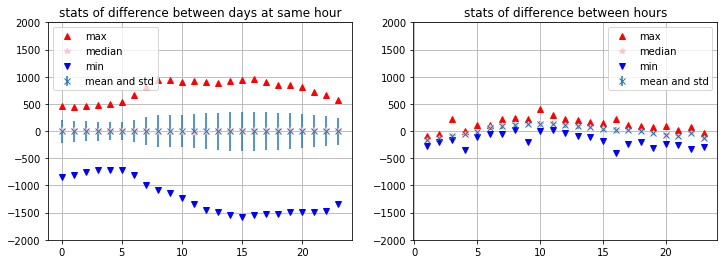

DAYTON_hourly(October)


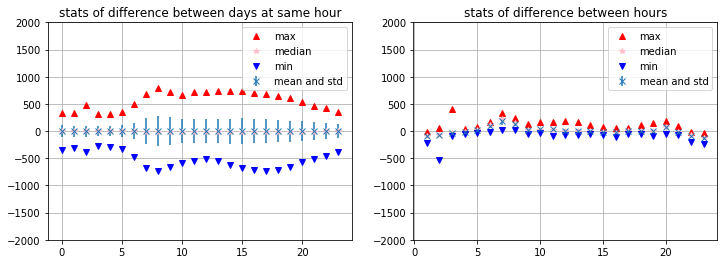

DEOK_hourly(January)


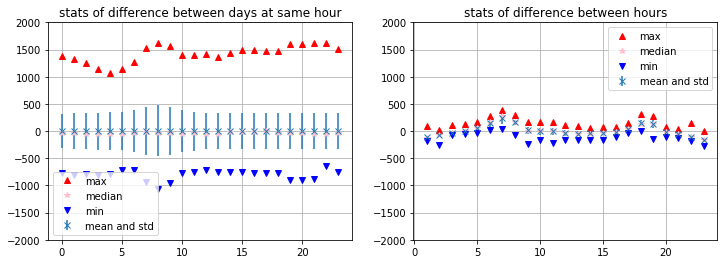

DEOK_hourly(April)


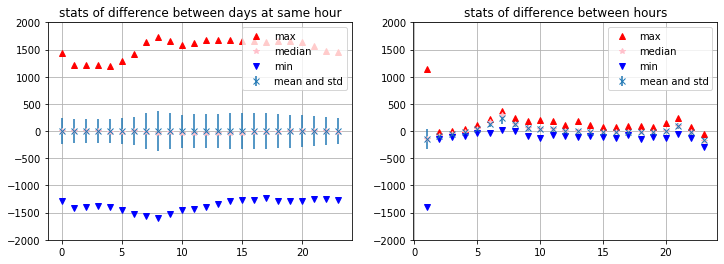

DEOK_hourly(July)


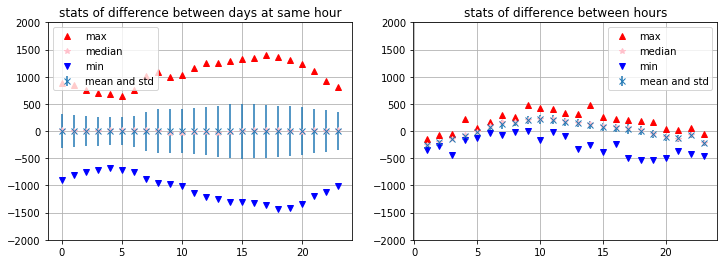

DEOK_hourly(October)


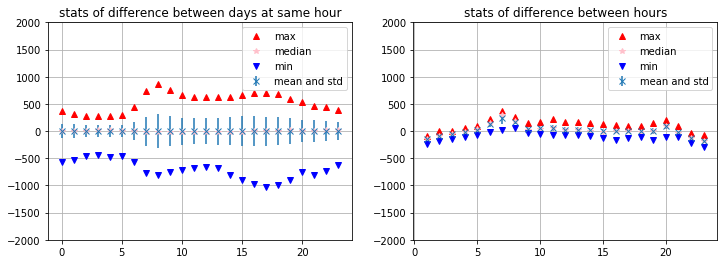

In [10]:
plotter.plot_diff_days_hours_each_month(data, [1, 4, 7, 10])

# Analysis summary
## Overall
- Consistent trends we found are,
    - Huge differences between databases
    - Averages of differences between days at same hours are close to zeros, although the standard variances of differences between days at same hours are not small
    - Averages of differences between hours didn't stay around zero but standard variances are relatively small.
    - Power consumptions in weekdays are higher than weekends.
    
## Database
- To get precise estimations, models should be constructed for each data set.
    - Some dataset has similar stats, however, overall, they are different each other.
    - It could be difficult to forecast the power consumptions from different dataset.

## Long term trends
- There is yearly pattern, but not exactly same in terms of max.
- peak in summertime and wintertime.
- relatively lower consumptions in Spring and Autumn.
- According to the spring and autumn data, they have quite similar trends to each other.
- There are no significant bumps around lunch time.
- In the summertime, peaks are around 3 PM
- In the winter time, there two peaks which are around 7 AM and 8 PM.
- There are also higher variances of winter/summer than the others.

## Weekly trends
- Power consumptions in weekdays are higher than weekends.
- Mondays are similar to the other weekdays but slightly smaller.
- Averages of differences between days at same hours are close to zeros. 
- The standard variances of differences between days at same hours are not small

## Daily trends
- The peak and is usually in dinner time (around 8 PM).
- There is second (sometimes highest) peak during breakfast time (around 7 AM).  
- In any seasons, sleeping time (around 0 AM to 5 AM) is the lower power consumptions.
- Both winter time and summer time have higher consumptions than in spring/autumn.
- Averages of differences between hours didn't stay around zero.
- Standard variances of differences between hours are relatively small.


# Further analysis
We need to investigate these items as below.
- Weekly trends such as differences between same weekdays over several weeks
- Monthly trends such as differences between same months over several years
- Holidays were not considered.
- Why the outliers (high peaks, low peaks, ...) were occurred.
- Relationships against external information such as temperatures


# Model to predict
According to the analysis, we found some consistent information, Especially,
- Averages of differences between days at same hours are close to zeros but some variances.
- Standard variances of differences between hours are relatively small.
- Dataset is different each other.

In order to capture these information, we propose the features as below.
- Power consumptions of several days before the target days
- Hourly differences of several days before the target days
- Model dataset individually